<a href="https://colab.research.google.com/github/bilalProgTech/btech-nmims/blob/master/NN-DL/Lab-Work/20230903-Lab-5-BTech-NNDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple RNN

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
rnn_units = 2
tf.keras.backend.clear_session()
rnn_model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(3, 1)),
    tf.keras.layers.SimpleRNN(rnn_units, activation='tanh'),
    tf.keras.layers.Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
rnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 2)                 8         
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
wx = rnn_model.get_weights()[0]
wh = rnn_model.get_weights()[1]
bh = rnn_model.get_weights()[2]
wy = rnn_model.get_weights()[3]
by = rnn_model.get_weights()[4]

In [ ]:
wx

array([[-0.42603856, -0.49728525]], dtype=float32)

In [ ]:
wh

array([[-0.98891187, -0.14850353],
       [-0.14850353,  0.98891187]], dtype=float32)

In [ ]:
wy

array([[-1.0720489 ],
       [ 0.31178486]], dtype=float32)

In [ ]:
bh

array([0., 0.], dtype=float32)

In [ ]:
by

array([0.], dtype=float32)

In [ ]:
x = np.array([[1, 2, 3], [3, 4, 5]])
x_input = np.reshape(x,(-1, 3, 1))
model_yhat = rnn_model.predict(x_input)
model_yhat

1/1 [==============================] - 1s 726ms/step


array([[0.39584044],
       [0.6311149 ]], dtype=float32)

In [ ]:
x_input

array([[[1],
        [2],
        [3]],

       [[3],
        [4],
        [5]]])

In [ ]:
x = np.array([[1, 2, 3]])
x_input = np.reshape(x,(-1, 3, 1))
rnn_units = 2
wx = [[3, -4]]
wy = [[-4], [2]]
wh = [[4, -5], [-3, 2]]
bh = 0
by = 11
'''
Code for RNN
'''
yhat

array([[5.]])

In [ ]:
h0, h1, h2, h3

(array([0., 0.]),
 array([[ 0.99505475, -0.9993293 ]]),
 array([[ 1., -1.]]),
 array([[ 1., -1.]]))

# Why tanh and not sigmoid?

In [ ]:
sequence_length = 100
timesteps = np.arange(0, sequence_length, 1)
sine_wave_data = np.sin(timesteps * 0.1)  # Create a sine wave as input data
sine_wave_data = sine_wave_data.reshape(-1, 1, 1)   # Reshape for RNN input

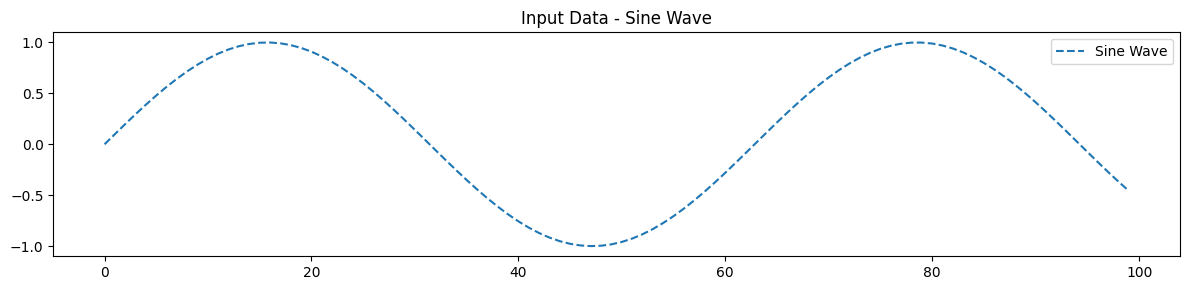

In [ ]:
plt.figure(figsize=(12, 3))
plt.plot(timesteps, sine_wave_data.reshape(-1), label='Sine Wave', linestyle='--')
plt.title('Input Data - Sine Wave')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
def build_rnn_model(activation):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(1, 1)),
        tf.keras.layers.SimpleRNN(10, activation=activation),
        tf.keras.layers.Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
build_rnn_model('tanh').summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 10)                120       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tanh_model = build_rnn_model('tanh')
sigmoid_model = build_rnn_model('sigmoid')

tanh_history = tanh_model.fit(sine_wave_data, sine_wave_data, epochs=100, verbose=0)
sigmoid_history = sigmoid_model.fit(sine_wave_data, sine_wave_data, epochs=100, verbose=0)

tanh_predictions = tanh_model.predict(sine_wave_data)
sigmoid_predictions = sigmoid_model.predict(sine_wave_data)

4/4 [==============================] - 0s 4ms/step


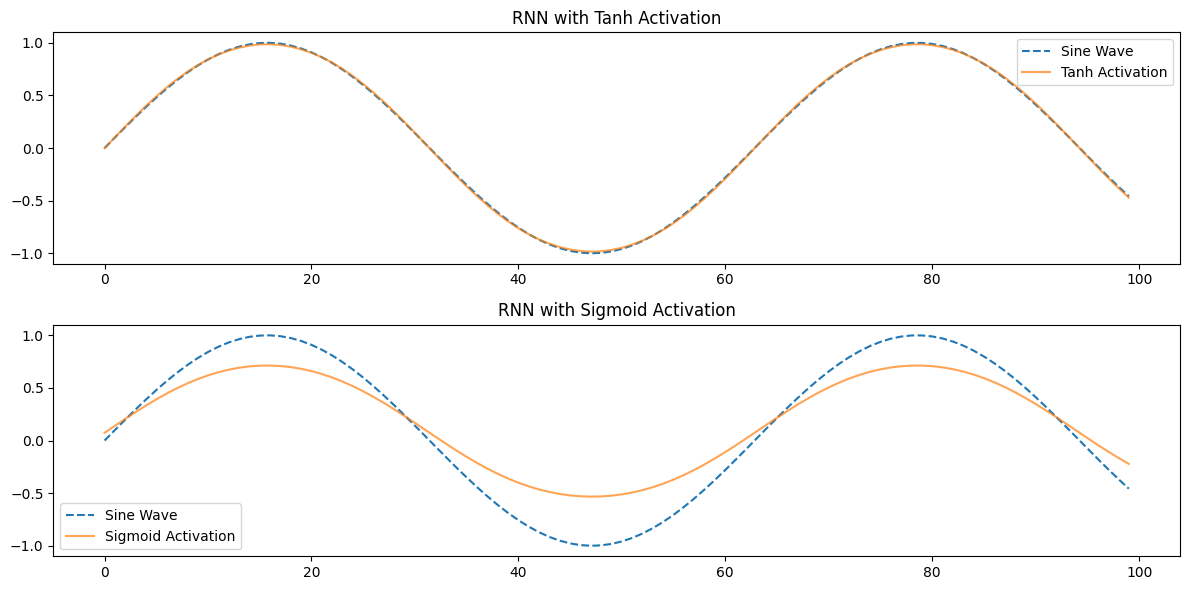

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(timesteps, sine_wave_data.reshape(-1), label='Sine Wave', linestyle='--')
plt.plot(timesteps, tanh_predictions.reshape(-1), label='Tanh Activation', alpha=0.7)
plt.title('RNN with Tanh Activation')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(timesteps, sine_wave_data.reshape(-1), label='Sine Wave', linestyle='--')
plt.plot(timesteps, sigmoid_predictions.reshape(-1), label='Sigmoid Activation', alpha=0.7)
plt.title('RNN with Sigmoid Activation')
plt.legend()

plt.tight_layout()
plt.show()

1.   The tanh activation is symmetric around zero, meaning it can represent both positive and negative values. This allows it to capture the oscillations of the sine wave.
2.   The sigmoid activation is not symmetric; it primarily maps inputs to values near 0 or 1. It's more suited for binary classification problems where you need to make a decision between two classes.



# Tokenization and Pad Sequences

In [ ]:
import tensorflow as tf

In [ ]:
'''sentences = [
    'i love deeplearning',
    'I, love ai',
    'You love deeplearning!',
    'You think deeplearning is amazing'
]'''

sentences = ['This is an excellent movie', 'It was a wonderful movie',
             'You should watch this brilliant movie', 'Exceptionally good movie',
             'Horrible acting', 'I did not like the movie', 'I will not recommend you this movie', 'Pathetic and boring movie']

# sentences = ['I love waffles', 'Smith loves cakes and waffles','Cakes are better than waffles','Lucy baked two cakes for a birthday party']
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 100)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'movie': 1, 'this': 2, 'you': 3, 'i': 4, 'not': 5, 'is': 6, 'an': 7, 'excellent': 8, 'it': 9, 'was': 10, 'a': 11, 'wonderful': 12, 'should': 13, 'watch': 14, 'brilliant': 15, 'exceptionally': 16, 'good': 17, 'horrible': 18, 'acting': 19, 'did': 20, 'like': 21, 'the': 22, 'will': 23, 'recommend': 24, 'pathetic': 25, 'and': 26, 'boring': 27}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[2, 6, 7, 8, 1],
 [9, 10, 11, 12, 1],
 [3, 13, 14, 2, 15, 1],
 [16, 17, 1],
 [18, 19],
 [4, 20, 5, 21, 22, 1],
 [4, 23, 5, 24, 3, 2, 1],
 [25, 26, 27, 1]]

In [ ]:
test_sentences = [
    'i really love deeplearning',
    'ai is amazing and good'
]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences

[[4], [6, 26, 17]]

In [ ]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = 100, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'movie': 2, 'this': 3, 'you': 4, 'i': 5, 'not': 6, 'is': 7, 'an': 8, 'excellent': 9, 'it': 10, 'was': 11, 'a': 12, 'wonderful': 13, 'should': 14, 'watch': 15, 'brilliant': 16, 'exceptionally': 17, 'good': 18, 'horrible': 19, 'acting': 20, 'did': 21, 'like': 22, 'the': 23, 'will': 24, 'recommend': 25, 'pathetic': 26, 'and': 27, 'boring': 28}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
sequences

[[3, 7, 8, 9, 2],
 [10, 11, 12, 13, 2],
 [4, 14, 15, 3, 16, 2],
 [17, 18, 2],
 [19, 20],
 [5, 21, 6, 22, 23, 2],
 [5, 24, 6, 25, 4, 3, 2],
 [26, 27, 28, 2]]

In [ ]:
test_sentences = [
    'i really love deeplearning',
    'ai is amazing and good'
]
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_sequences

[[5, 1, 1, 1], [1, 7, 1, 27, 18]]

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences)
padded

array([[ 0,  0,  3,  7,  8,  9,  2],
       [ 0,  0, 10, 11, 12, 13,  2],
       [ 0,  4, 14, 15,  3, 16,  2],
       [ 0,  0,  0,  0, 17, 18,  2],
       [ 0,  0,  0,  0,  0, 19, 20],
       [ 0,  5, 21,  6, 22, 23,  2],
       [ 5, 24,  6, 25,  4,  3,  2],
       [ 0,  0,  0, 26, 27, 28,  2]], dtype=int32)

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')
padded

array([[ 3,  7,  8,  9,  2,  0,  0],
       [10, 11, 12, 13,  2,  0,  0],
       [ 4, 14, 15,  3, 16,  2,  0],
       [17, 18,  2,  0,  0,  0,  0],
       [19, 20,  0,  0,  0,  0,  0],
       [ 5, 21,  6, 22, 23,  2,  0],
       [ 5, 24,  6, 25,  4,  3,  2],
       [26, 27, 28,  2,  0,  0,  0]], dtype=int32)

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=4)
padded

array([[ 7,  8,  9,  2],
       [11, 12, 13,  2],
       [15,  3, 16,  2],
       [17, 18,  2,  0],
       [19, 20,  0,  0],
       [ 6, 22, 23,  2],
       [25,  4,  3,  2],
       [26, 27, 28,  2]], dtype=int32)

In [ ]:
padded = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post', maxlen=4, truncating='post')
padded

array([[ 3,  7,  8,  9],
       [10, 11, 12, 13],
       [ 4, 14, 15,  3],
       [17, 18,  2,  0],
       [19, 20,  0,  0],
       [ 5, 21,  6, 22],
       [ 5, 24,  6, 25],
       [26, 27, 28,  2]], dtype=int32)

# Embeddings

In [ ]:
corpus = [
    # Positive Reviews

    'This is an excellent movie',
    'The move was fantastic I like it',
    'You should watch it is brilliant',
    'Exceptionally good',
    'Wonderfully directed and executed I like it',
    'Its a fantastic series',
    'Never watched such a brillent movie',
    'It is a Wonderful movie',

    # Negtive Reviews

    "horrible acting",
    'waste of money',
    'pathetic picture',
    'It was very boring',
    'I did not like the movie',
    'The movie was horrible',
    'I will not recommend',
    'The acting is pathetic'
]

In [ ]:
sentiments = np.array([1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0])

In [ ]:
word_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
word_tokenizer.fit_on_texts(corpus)
word_index = word_tokenizer.word_index
print(word_index)

{'<OOV>': 1, 'movie': 2, 'it': 3, 'is': 4, 'the': 5, 'i': 6, 'was': 7, 'like': 8, 'a': 9, 'fantastic': 10, 'horrible': 11, 'acting': 12, 'pathetic': 13, 'not': 14, 'this': 15, 'an': 16, 'excellent': 17, 'move': 18, 'you': 19, 'should': 20, 'watch': 21, 'brilliant': 22, 'exceptionally': 23, 'good': 24, 'wonderfully': 25, 'directed': 26, 'and': 27, 'executed': 28, 'its': 29, 'series': 30, 'never': 31, 'watched': 32, 'such': 33, 'brillent': 34, 'wonderful': 35, 'waste': 36, 'of': 37, 'money': 38, 'picture': 39, 'very': 40, 'boring': 41, 'did': 42, 'will': 43, 'recommend': 44}


In [ ]:
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

45

In [ ]:
embedded_sequences = word_tokenizer.texts_to_sequences(corpus)
print(embedded_sequences)

[[15, 4, 16, 17, 2], [5, 18, 7, 10, 6, 8, 3], [19, 20, 21, 3, 4, 22], [23, 24], [25, 26, 27, 28, 6, 8, 3], [29, 9, 10, 30], [31, 32, 33, 9, 34, 2], [3, 4, 9, 35, 2], [11, 12], [36, 37, 38], [13, 39], [3, 7, 40, 41], [6, 42, 14, 8, 5, 2], [5, 2, 7, 11], [6, 43, 14, 44], [5, 12, 4, 13]]


In [ ]:
longest_sentence = len(max(embedded_sequences, key=len))
padded_sentences = tf.keras.preprocessing.sequence.pad_sequences(embedded_sequences, maxlen=longest_sentence, padding='post')
print(padded_sentences)

[[15  4 16 17  2  0  0]
 [ 5 18  7 10  6  8  3]
 [19 20 21  3  4 22  0]
 [23 24  0  0  0  0  0]
 [25 26 27 28  6  8  3]
 [29  9 10 30  0  0  0]
 [31 32 33  9 34  2  0]
 [ 3  4  9 35  2  0  0]
 [11 12  0  0  0  0  0]
 [36 37 38  0  0  0  0]
 [13 39  0  0  0  0  0]
 [ 3  7 40 41  0  0  0]
 [ 6 42 14  8  5  2  0]
 [ 5  2  7 11  0  0  0]
 [ 6 43 14 44  0  0  0]
 [ 5 12  4 13  0  0  0]]


In [ ]:
embedding_dim = 4
tf.keras.backend.clear_session()
embedding_model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim,
                              input_length=longest_sentence, name='embedding'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
embedding_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
embedding_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 7, 4)              180       
                                                                 
 flatten (Flatten)           (None, 28)                0         
                                                                 
 dense (Dense)               (None, 1)                 29        
                                                                 
Total params: 209
Trainable params: 209
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = embedding_model.fit(padded_sentences, sentiments, epochs=50, verbose=0)

In [ ]:
embedding_model.evaluate(padded_sentences, sentiments)

1/1 [==============================] - 0s 286ms/step - loss: 0.6010 - accuracy: 1.0000


[0.6010066866874695, 1.0]

In [ ]:
emb_weights = embedding_model.get_weights()[0]
len(emb_weights)

45

In [ ]:
emb_weights[16]

array([ 0.08679192, -0.05811909, -0.04714747, -0.09785647], dtype=float32)

In [ ]:
emb_weights[23]

array([-0.0667068 , -0.09568407, -0.02033625, -0.01254036], dtype=float32)

In [ ]:
emb_weights[35]

array([-0.01022675,  0.03156364,  0.01642295,  0.04429709], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

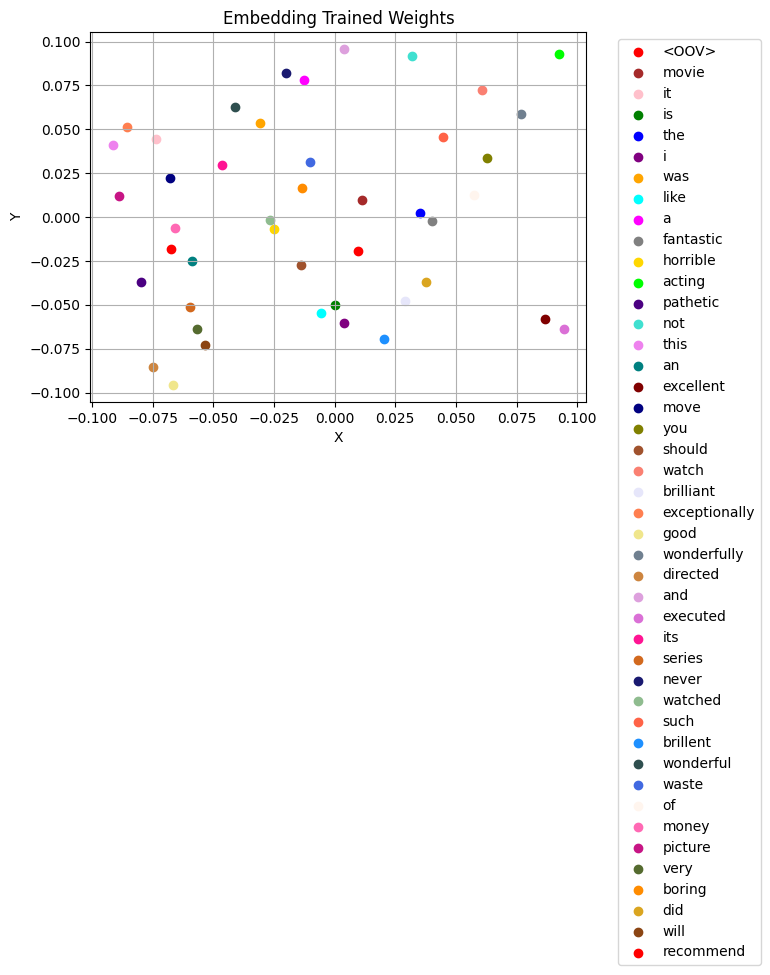

In [ ]:
colors = plt.cm.jet(np.linspace(0, 1, len(emb_weights)))

custom_colors = ['red', 'brown', 'pink', 'green', 'blue', 'purple', 'orange',
                 'cyan', 'magenta', 'gray', 'gold', 'lime', 'indigo',
                 'turquoise', 'violet', 'teal', 'maroon', 'navy', 'olive',
                 'sienna', 'salmon', 'lavender', 'coral', 'khaki', 'slategray',
                 'peru', 'plum', 'orchid', 'deeppink', 'chocolate',
                 'midnightblue', 'darkseagreen', 'tomato', 'dodgerblue',
                 'darkslategray', 'royalblue', 'seashell', 'hotpink',
                 'mediumvioletred', 'darkolivegreen', 'darkorange',
                 'goldenrod', 'saddlebrown']

for i, vocab_it in zip(range(len(emb_weights)), word_tokenizer.word_index.keys()):
    x = emb_weights[i, 0]
    y = emb_weights[i, 1]
    color = custom_colors[i % len(custom_colors)]
    plt.scatter(x, y, label=vocab_it, color=color)

plt.title("Embedding Trained Weights")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Simple RNN for NLP

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d nelgiriyewithana/mcdonalds-store-reviews
!unzip *.zip

  0% 0.00/1.78M [00:00<?, ?B/s]
100% 1.78M/1.78M [00:00<00:00, 51.9MB/s]
Archive:  mcdonalds-store-reviews.zip
  inflating: McDonald_s_Reviews.csv  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import nltk
import string
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
pd.set_option("display.max_colwidth", 200)

In [ ]:
data = pd.read_csv('/content/McDonald_s_Reviews.csv', encoding='latin-1')
data.head()

,reviewer_id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,1,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",3 months ago,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clea...",1 star
1,2,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant exp...",4 stars
2,3,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",5 days ago,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be la...,1 star
3,4,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",a month ago,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5 stars
4,5,McDonald's,Fast food restaurant,"13749 US-183 Hwy, Austin, TX 78750, United States",30.460718,-97.792874,"1,240",2 months ago,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they eith...",1 star


In [ ]:
data.columns

Index(['reviewer_id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [ ]:
data = data[['review', 'rating']]
data.head()

,review,rating
0,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clea...",1 star
1,"It'd McDonalds. It is what it is as far as the food and atmosphere go. The staff here does make a difference. They are all friendly, accommodating and always smiling. Makes for a more pleasant exp...",4 stars
2,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be la...,1 star
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,5 stars
4,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they eith...",1 star


In [ ]:
data["rating"].value_counts(normalize=True)

5 stars    0.307642
1 star     0.282399
4 stars    0.173284
3 stars    0.144269
2 stars    0.092406
Name: rating, dtype: float64

In [ ]:
data['rating'] = data['rating'].str[0].astype('int64')
data = data[data['rating'].isin([1, 5])]
data['rating'] = np.where(data['rating']==1, 1, 0)
data["rating"].value_counts(normalize=True)

<ipython-input-52-caaec1af8a02>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating'] = np.where(data['rating']==1, 1, 0)


0    0.521391
1    0.478609
Name: rating, dtype: float64

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

nltk.download('words')
words = set(nltk.corpus.words.words())

def remove_nonenglish(text):
    return " ".join(w for w in nltk.wordpunct_tokenize(text) if w.lower() in words or not w.isalpha())

def remove_handles(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
def clean_text(text):
    text = remove_handles(text, '@[\w]*')
    text = re.sub("\'", "", text)
    text = re.sub("[^a-zA-Z]"," ",text)
    text = re.sub("http\S+|www.\S+","", text)
    text = text.lower()
    text = ' '.join([w for w in text.split() if len(w)>=2])
    text = remove_stopwords(text)
    text = remove_nonenglish(text)
    words = text.split()
    text = " ".join(sorted(set(words), key=words.index))
    return text

In [ ]:
data['clean_review'] = data['review'].apply(lambda x: clean_text(x))
data.head()

,review,rating,clean_review
0,"Why does it look like someone spit on my food?\nI had a normal transaction, everyone was chill and polite, but now i dont want to eat this. Im trying not to think about what this milky white/clea...",1,look like someone spit food normal transaction everyone chill polite dont want eat trying think milky white clear substance sure coming back
2,Made a mobile order got to the speaker and checked it in.\nLine was not moving so I had to leave otherwise Iï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½d be la...,1,made mobile order got speaker checked line moving leave otherwise late work never refund said could get money back person stuck system went next day manager told
3,My mc. Crispy chicken sandwich was ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ï¿½ customer service was quick and p,0,crispy chicken sandwich customer service quick
4,"I repeat my order 3 times in the drive thru, and she still manage to mess it up , it was suppose to be a large meal double filet of fish with large fries , no cheese . It was all wrong , they eith...",1,repeat order times drive still manage mess suppose large meal double filet fish cheese wrong either need pay close attention made understand work
5,I work for door dash and they locked us all out to wait in a long line for no reason at 10. I tried to beg them to open it because I'm door dash and they refused. Covid is over get a new job,1,work door dash locked us wait long line reason tried beg open covid get new job


In [ ]:
from wordcloud import WordCloud

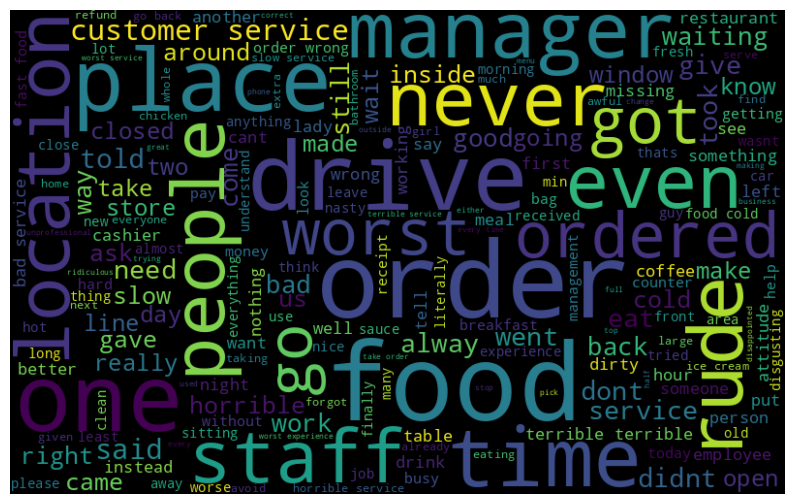

In [ ]:
all_words = ' '.join([text for text in data[data['rating']==1]['clean_review']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
train, test = train_test_split(data, test_size=0.2, random_state=12)
train.shape, test.shape

((15764, 3), (3941, 3))

In [ ]:
train["rating"].value_counts(normalize=True)

0    0.520807
1    0.479193
Name: rating, dtype: float64

In [ ]:
test["rating"].value_counts(normalize=True)

0    0.523725
1    0.476275
Name: rating, dtype: float64

In [ ]:
y_train = train['rating']
y_test = test['rating']

In [ ]:
train_tokenizer = tf.keras.preprocessing.text.Tokenizer(oov_token='<OOV>')
train_tokenizer.fit_on_texts(train['clean_review'].values)
train_word_index = train_tokenizer.word_index
print(train_word_index)

{'<OOV>': 1, 'service': 2, 'food': 3, 'order': 4, 'excellent': 5, 'good': 6, 'place': 7, 'get': 8, 'drive': 9, 'one': 10, 'fast': 11, 'time': 12, 'staff': 13, 'great': 14, 'like': 15, 'go': 16, 'always': 17, 'even': 18, 'ever': 19, 'never': 20, 'people': 21, 'got': 22, 'location': 23, 'customer': 24, 'manager': 25, 'dont': 26, 'clean': 27, 'worst': 28, 'rude': 29, 'back': 30, 'friendly': 31, 'ordered': 32, 'nice': 33, 'bad': 34, 'terrible': 35, 'went': 36, 'would': 37, 'wait': 38, 'didnt': 39, 'wrong': 40, 'give': 41, 'took': 42, 'experience': 43, 'said': 44, 'long': 45, 'really': 46, 'love': 47, 'fresh': 48, 'hot': 49, 'horrible': 50, 'cold': 51, 'line': 52, 'slow': 53, 'right': 54, 'eat': 55, 'told': 56, 'waiting': 57, 'take': 58, 'know': 59, 'inside': 60, 'best': 61, 'us': 62, 'coffee': 63, 'work': 64, 'quick': 65, 'come': 66, 'way': 67, 'window': 68, 'well': 69, 'could': 70, 'around': 71, 'meal': 72, 'want': 73, 'restaurant': 74, 'also': 75, 'made': 76, 'times': 77, 'going': 78, 'm

In [ ]:
vocab_length = len(train_word_index) + 1
vocab_length

5478

In [ ]:
train_sequences = train_tokenizer.texts_to_sequences(train['clean_review'].values)
len(train_sequences)

15764

In [ ]:
test_sequences = train_tokenizer.texts_to_sequences(test['clean_review'].values)
len(test_sequences)

3941

In [ ]:
longest_sentence = len(max(train_sequences, key=len))
train_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(train_sequences, padding='post', maxlen=longest_sentence, truncating='post')
test_padded_seqeunces = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, padding='post', maxlen=longest_sentence, truncating='post')

In [ ]:
longest_sentence

156

In [ ]:
vocab_length

5478

In [ ]:
embedding_dim = 8
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim,
                              input_length=longest_sentence),
    tf.keras.layers.SimpleRNN(64, activation='tanh', return_sequences=True),
    tf.keras.layers.SimpleRNN(32, activation='tanh'),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 156, 8)            43824     
                                                                 
 simple_rnn (SimpleRNN)      (None, 156, 64)           4672      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 32)                3104      
                                                                 
 dense (Dense)               (None, 24)                792       
                                                                 
 dense_1 (Dense)             (None, 1)                 25        
                                                                 
Total params: 52,417
Trainable params: 52,417
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(train_padded_seqeunces, y_train, epochs=10,
                    validation_data=(test_padded_seqeunces, y_test))

Epoch 1/10
493/493 [==============================] - 52s 100ms/step - loss: 0.6994 - accuracy: 0.5043 - val_loss: 0.6928 - val_accuracy: 0.5077
Epoch 2/10
493/493 [==============================] - 49s 100ms/step - loss: 0.6976 - accuracy: 0.5084 - val_loss: 0.7017 - val_accuracy: 0.5237
Epoch 3/10
493/493 [==============================] - 49s 99ms/step - loss: 0.6984 - accuracy: 0.5072 - val_loss: 0.6924 - val_accuracy: 0.5237
Epoch 4/10
493/493 [==============================] - 53s 108ms/step - loss: 0.6302 - accuracy: 0.6230 - val_loss: 0.4359 - val_accuracy: 0.8163
Epoch 5/10
493/493 [==============================] - 46s 94ms/step - loss: 0.3867 - accuracy: 0.8550 - val_loss: 0.4983 - val_accuracy: 0.7846
Epoch 6/10
493/493 [==============================] - 48s 98ms/step - loss: 0.3510 - accuracy: 0.8748 - val_loss: 0.4720 - val_accuracy: 0.8165
Epoch 7/10
493/493 [==============================] - 49s 100ms/step - loss: 0.3118 - accuracy: 0.8909 - val_loss: 0.3414 - val_accur

In [ ]:
model.evaluate(test_padded_seqeunces, y_test)

124/124 [==============================] - 2s 19ms/step - loss: 0.3471 - accuracy: 0.8577


[0.34705451130867004, 0.8576503396034241]

In [ ]:
test_prob = model.predict(test_padded_seqeunces)
test_pred = np.where(test_prob > 0.5, 1, 0)

124/124 [==============================] - 5s 36ms/step


In [ ]:
accuracy_score(y_test, test_pred)

0.8576503425526516

In [ ]:
confusion_matrix(y_test, test_pred)

array([[1847,  217],
       [ 344, 1533]])